In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
# fetch_housing_data()

In [3]:
import numpy as np
import pandas as pd


def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# The .info() provides info on the number of non-null count and types of each feature.
# Observations:
# - The `total_bedrooms` seems to have some null values.
# - The `ocean_proximity` dtype is an object, we can probably convert it into a category later.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# The describe gives information about the interquatile range, which is useful to detect outliers.
# We will come to this later.
#
# What is not obvious here is the scalars for some column - for example, median income is probably expressed in millions.
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# Check the categories that exists, and the normalized ratio of each category.
housing["ocean_proximity"].value_counts(normalize=True)

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

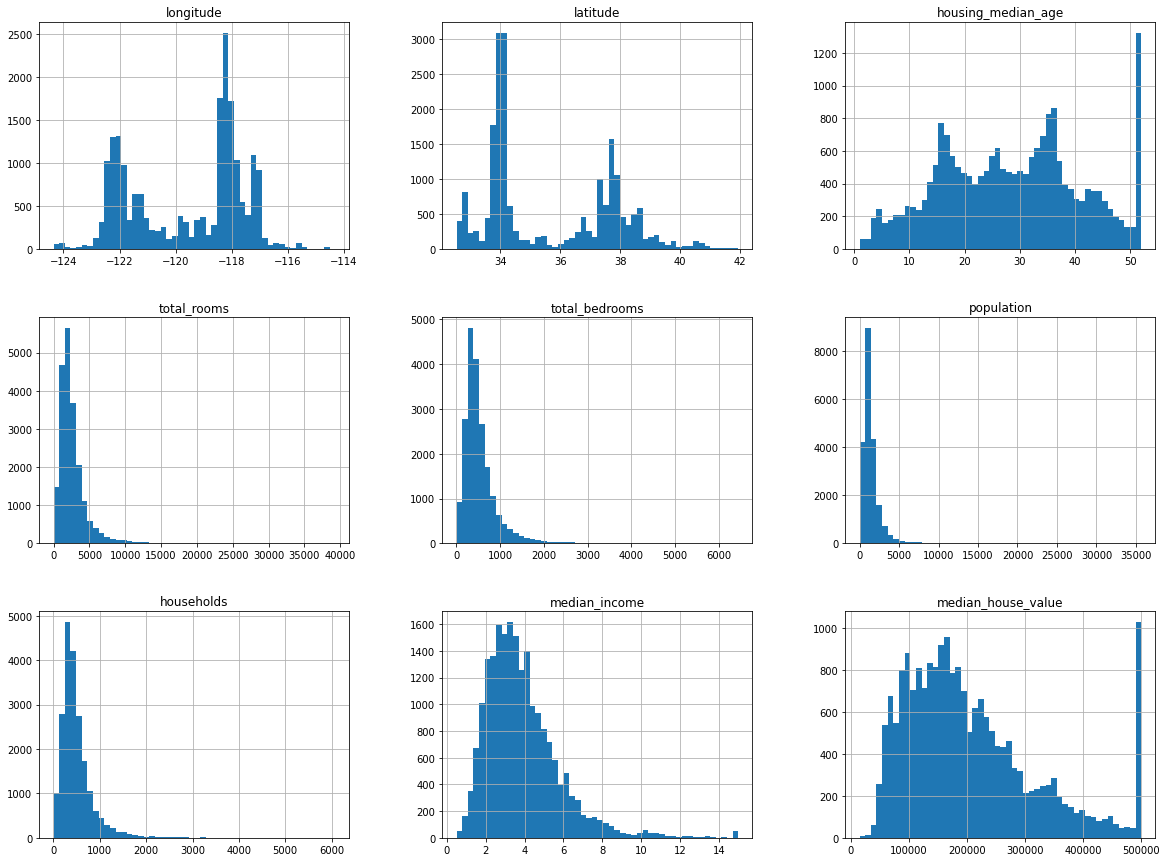

In [8]:
# Plot the histogram for each numerical attributes.
_ = housing.hist(bins=50, figsize=(20, 15))

## Creating test set

<AxesSubplot:>

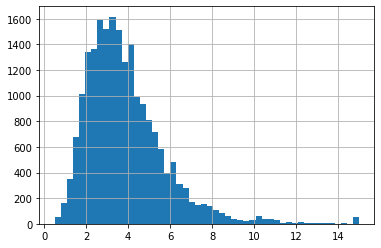

In [9]:
housing.median_income.hist(bins=50)

<AxesSubplot:>

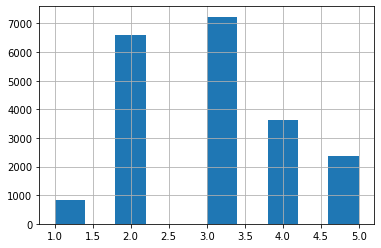

In [10]:
income_cat = pd.cut(
    housing["median_income"],
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5],
)
income_cat.hist()

In [11]:
from sklearn.model_selection import train_test_split

# NOTE: When dealing with imbalanced dataset, passing `stratify=y` will ensure balance distribution of output variables in each dataset.
train_set, test_set = train_test_split(
    housing, test_size=0.2, random_state=42, stratify=income_cat
)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

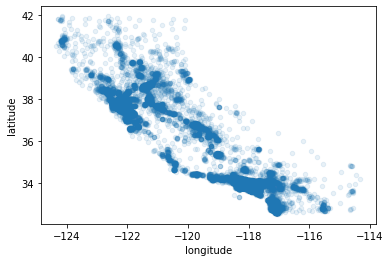

In [12]:
# Setting alpha option to 0.1 makes it easier to visualize overlapping high density data points.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

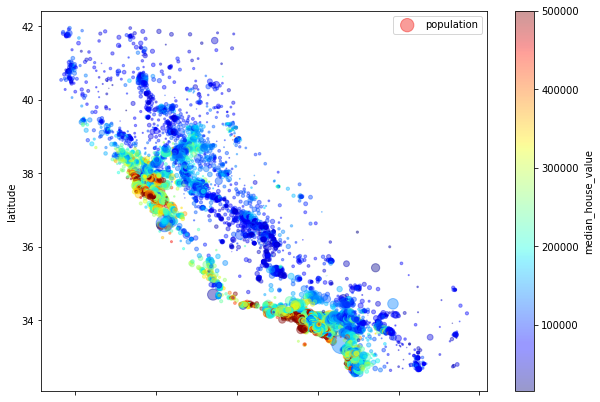

In [13]:
_ = housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"] / 100,  # Radius of the circle
    label="population",
    figsize=(10, 7),
    c="median_house_value",  # Color option
    cmap="jet",
    colorbar=True,
)

## Looking for correlations

In [14]:
corr_matrix = housing.corr()

In [15]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

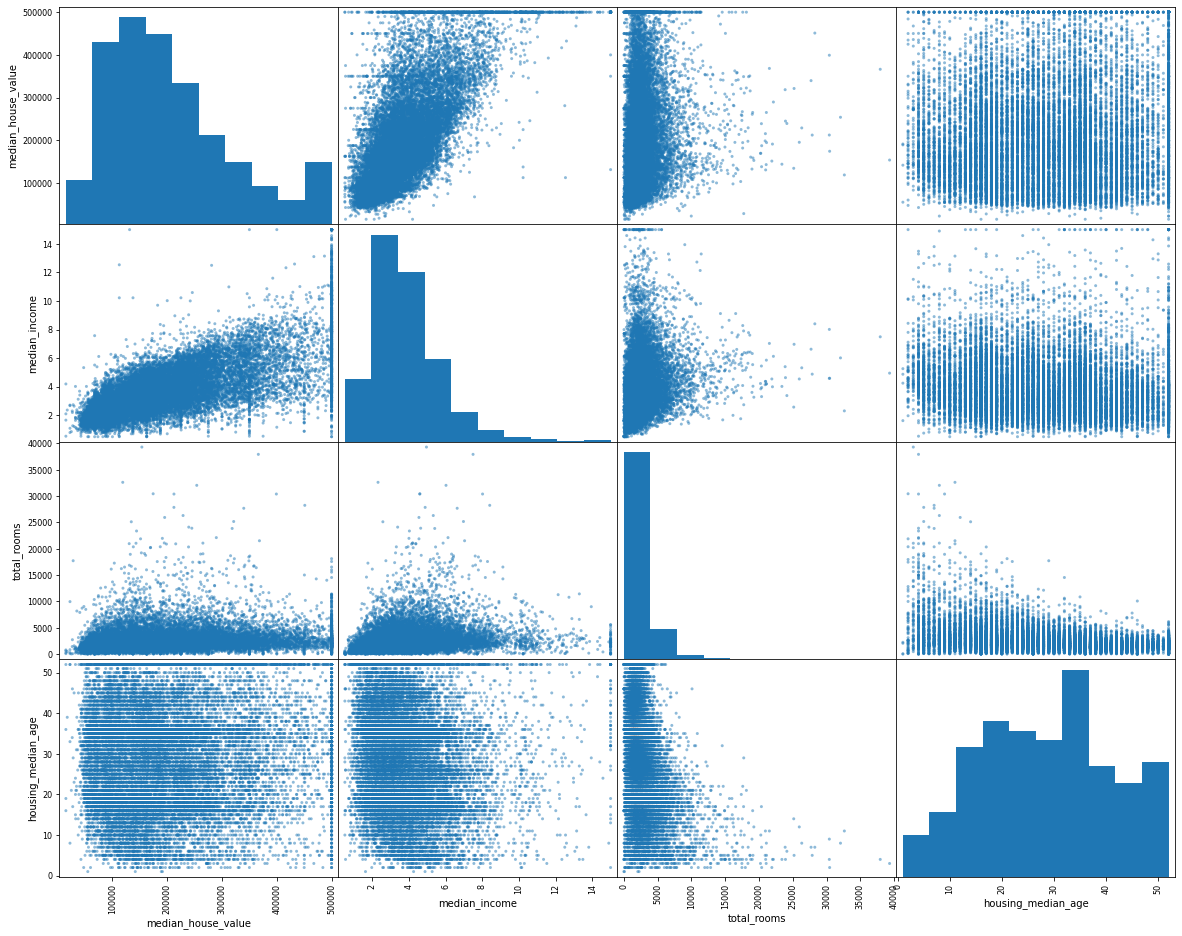

In [16]:
from pandas.plotting import scatter_matrix

attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age",
]

_ = scatter_matrix(housing[attributes], figsize=(20, 16))

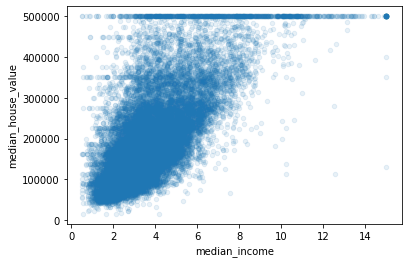

In [17]:
_ = housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [18]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [19]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [20]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [22]:
# Since the median can only be computed on numerical attributes, drop the categorical attribute.
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [23]:
# View the median of each attribute.
for feature, median in zip(housing_num.columns, imputer.statistics_):
    print(f"{feature}: {median}")

longitude: -118.51
latitude: 34.26
housing_median_age: 29.0
total_rooms: 2119.0
total_bedrooms: 433.0
population: 1164.0
households: 408.0
median_income: 3.54155


In [24]:
# The above is similar to calling
housing_num.median()

longitude             -118.51000
latitude                34.26000
housing_median_age      29.00000
total_rooms           2119.00000
total_bedrooms         433.00000
population            1164.00000
households             408.00000
median_income            3.54155
dtype: float64

In [25]:
# Calling transform outputs a numpy array
X = imputer.transform(housing_num)

# Convert back the numpy array to a pandas DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


## Handling Text and Categorical Attributes

In [26]:
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[["ocean_proximity"]]

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [27]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [28]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [29]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X):
        return self  # Nothing else to do

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[
                X, rooms_per_household, population_per_household, bedrooms_per_room
            ]
        return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("attribs_adder", CombinedAttributesAdder()),
        ("std_scaler", StandardScaler()),
    ]
)
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [32]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer(
    [("num", num_pipeline, num_attribs), ("cat", OneHotEncoder(), cat_attribs)]
)

housing_prepared = full_pipeline.fit_transform(housing)

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [34]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [35]:
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [36]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [37]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_mse, lin_rmse

(4709785076.060029, 68627.87390018745)

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [39]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mse, tree_rmse

(0.0, 0.0)

In [40]:
from sklearn.model_selection import cross_val_score

# cross_val_score expects a utility function (greater is better) rather than cost function (lower is better)
# the scoring function used is the opposite of the MSE
# HU-LC (higher utility, lower cost), like HULK
scores = cross_val_score(
    tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10
)
tree_rmse_scores = np.sqrt(-scores)

In [41]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


display_scores(tree_rmse_scores)

Scores: [73003.00256216 70252.0365239  68017.83535686 71655.43507351
 71078.57980436 76719.52976617 71767.95492597 73470.79609629
 69420.53291342 71093.22264744]
Mean: 71647.8925670064
Standard deviation: 2271.8695456649943


In [42]:
lin_scores = cross_val_score(
    lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10
)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180644


In [43]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [44]:
forest_scores = cross_val_score(
    forest_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10,
)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [51226.06019302 49371.50036838 46892.20108627 51912.03761034
 47460.64757947 51606.3669665  52482.06697169 49972.2309842
 48582.33707475 53650.7176089 ]
Mean: 50315.61664435055
Standard deviation: 2115.2791536797854


In [45]:
import joblib

# Saving model.
# joblib.dump(forest_reg, './datasets/forest_reg.pkl')

# Loading model.
# forest_reg = joblib.load('./datasets/forest_reg.pk;')

## Grid Search

In [46]:
from sklearn.model_selection import GridSearchCV

# To check for available hyperparameters: help(RandomForestRegressor)
param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]},
]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True,
)

In [47]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [49]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [50]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

62877.21383007251 {'max_features': 2, 'n_estimators': 3}
55499.13932472679 {'max_features': 2, 'n_estimators': 10}
52586.38051955695 {'max_features': 2, 'n_estimators': 30}
59501.97395616681 {'max_features': 4, 'n_estimators': 3}
52633.73535174768 {'max_features': 4, 'n_estimators': 10}
50441.916060947835 {'max_features': 4, 'n_estimators': 30}
59482.19616529393 {'max_features': 6, 'n_estimators': 3}
52333.98309096394 {'max_features': 6, 'n_estimators': 10}
49812.10276624736 {'max_features': 6, 'n_estimators': 30}
59234.545195575636 {'max_features': 8, 'n_estimators': 3}
51774.94613098871 {'max_features': 8, 'n_estimators': 10}
50104.76081660599 {'max_features': 8, 'n_estimators': 30}
62900.961208689216 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54585.51240828081 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60349.317751533636 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52023.25134038371 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [51]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.34810247e-02, 6.30366266e-02, 4.25992275e-02, 1.89063061e-02,
       1.63273933e-02, 1.80570848e-02, 1.73881317e-02, 3.64943551e-01,
       5.06044520e-02, 1.05458049e-01, 5.96697148e-02, 1.18902045e-02,
       1.50558153e-01, 1.06545872e-04, 2.34758012e-03, 4.62595576e-03])

In [52]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3649435509679097, 'median_income'),
 (0.15055815283562096, 'INLAND'),
 (0.10545804852996706, 'pop_per_hhold'),
 (0.07348102470275991, 'longitude'),
 (0.06303662659786774, 'latitude'),
 (0.05966971482911248, 'bedrooms_per_room'),
 (0.05060445198386847, 'rooms_per_hhold'),
 (0.04259922745250656, 'housing_median_age'),
 (0.018906306055475993, 'total_rooms'),
 (0.018057084805015, 'population'),
 (0.01738813172849928, 'households'),
 (0.016327393304142367, 'total_bedrooms'),
 (0.011890204452921225, '<1H OCEAN'),
 (0.004625955762295999, 'NEAR OCEAN'),
 (0.0023475801201622614, 'NEAR BAY'),
 (0.00010654587187505364, 'ISLAND')]

In [53]:
final_model = grid_search.best_estimator_
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_rmse = mean_squared_error(y_test, final_predictions)
final_mse = mean_squared_error(
    y_test, final_predictions, squared=False
)  # or np.sqrt(final_rmse)
final_rmse, final_mse

(2311954932.3721986, 48082.79247685391)

In [54]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(
    stats.t.interval(
        confidence,
        len(squared_errors) - 1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors),
    )
)

array([46084.33602546, 50001.43835768])